In [1]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import matplotlib.patches as mpatches
import seaborn as sb
from scipy.stats import gaussian_kde

In [2]:
crime_rate_df = pd.read_csv("data/crimerates-by-state-2005.csv")
crime_rate_df.head()

,state,murder,forcible_rape,robbery,aggravated_assault,burglary,larceny_theft,motor_vehicle_theft,population
0,United States,5.6,31.7,140.7,291.1,726.7,2286.3,416.7,295753151
1,Alabama,8.2,34.3,141.4,247.8,953.8,2650.0,288.3,4545049
2,Alaska,4.8,81.1,80.9,465.1,622.5,2599.1,391.0,669488
3,Arizona,7.5,33.8,144.4,327.4,948.4,2965.2,924.4,5974834
4,Arkansas,6.7,42.9,91.1,386.8,1084.6,2711.2,262.1,2776221


In [3]:
birth_rate_df = pd.read_csv("data/birth-rates-yearly.csv")
birth_rate_df.head()

,year,rate
0,1960,36.400
1,1961,35.179
2,1962,33.863
3,1963,32.459
4,1964,30.994


### Scatterplot

In [4]:
states_crime = crime_rate_df[crime_rate_df['state'] != 'United States']
states_crime.head()

,state,murder,forcible_rape,robbery,aggravated_assault,burglary,larceny_theft,motor_vehicle_theft,population
1,Alabama,8.2,34.3,141.4,247.8,953.8,2650.0,288.3,4545049
2,Alaska,4.8,81.1,80.9,465.1,622.5,2599.1,391.0,669488
3,Arizona,7.5,33.8,144.4,327.4,948.4,2965.2,924.4,5974834
4,Arkansas,6.7,42.9,91.1,386.8,1084.6,2711.2,262.1,2776221
5,California,6.9,26.0,176.1,317.3,693.3,1916.5,712.8,35795255


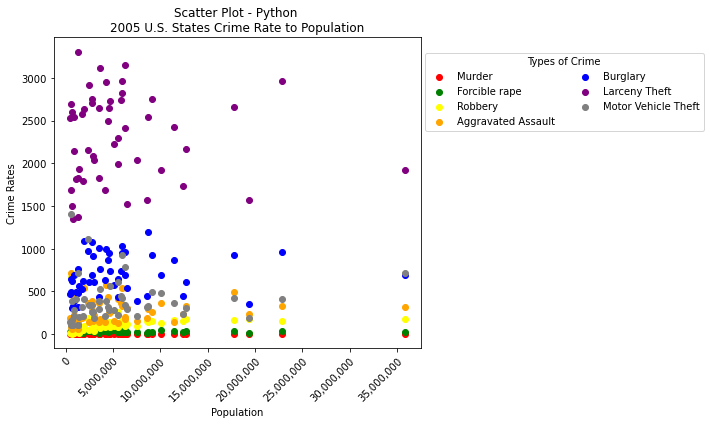

In [5]:
fig, ax = plt.subplots(figsize = (10, 6))

plt.scatter(states_crime['population'], states_crime['murder'], c = 'red', label = 'Murder')
plt.scatter(states_crime['population'], states_crime['forcible_rape'], c = 'green', label = 'Forcible rape')
plt.scatter(states_crime['population'], states_crime['robbery'], c = 'yellow', label = 'Robbery')
plt.scatter(states_crime['population'], states_crime['aggravated_assault'], c = 'orange', label = 'Aggravated Assault')
plt.scatter(states_crime['population'], states_crime['burglary'], c = 'blue', label = 'Burglary')
plt.scatter(states_crime['population'], states_crime['larceny_theft'], c = 'purple', label = 'Larceny Theft')
plt.scatter(states_crime['population'], states_crime['motor_vehicle_theft'], c = 'gray', label = 'Motor Vehicle Theft')

ax.get_xaxis().set_major_formatter(
    tick.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xlabel("Population")
plt.xticks(rotation = 45, ha = 'right', rotation_mode = 'anchor')
plt.ylabel("Crime Rates")
plt.title("Scatter Plot - Python \n2005 U.S. States Crime Rate to Population")

ax.legend(loc=(1.01, 0.7), ncol = 2, title = 'Types of Crime')
plt.tight_layout()

plt.show()

# Save figure
ax.get_figure().savefig('images/scatter-plot-python.png',
           bbox_inches = 'tight',
           transparent = True)

### Bubble Chart

In [6]:
us_crime = crime_rate_df[crime_rate_df['state'] == 'United States']
us_crime.head()

,state,murder,forcible_rape,robbery,aggravated_assault,burglary,larceny_theft,motor_vehicle_theft,population
0,United States,5.6,31.7,140.7,291.1,726.7,2286.3,416.7,295753151


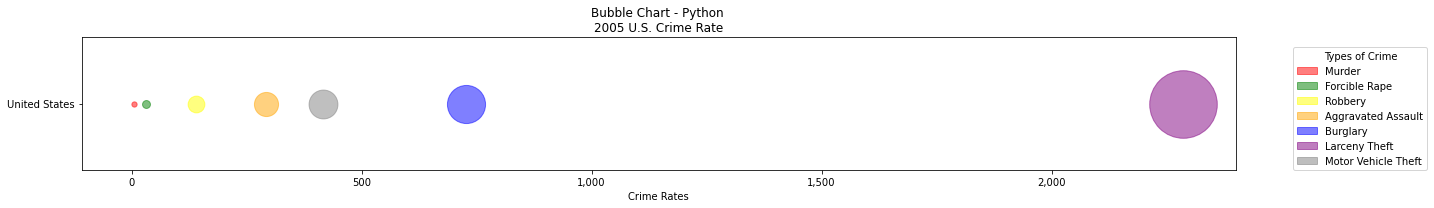

In [7]:
fig, ax = plt.subplots(figsize = (20, 3))

plt.scatter(us_crime['murder'], us_crime['state'],
            c = 'red', label = 'Murder', s = us_crime['murder'] * 5,
           alpha = 0.5)
plt.scatter(us_crime['forcible_rape'], us_crime['state'], 
            c = 'green', label = 'Forcible rape', s = us_crime['forcible_rape'] * 2,
           alpha = 0.5)
plt.scatter(us_crime['robbery'], us_crime['state'], 
            c = 'yellow', label = 'Robbery', s = us_crime['robbery'] * 2,
           alpha = 0.5)
plt.scatter(us_crime['aggravated_assault'], us_crime['state'], 
            c = 'orange', label = 'Aggravated Assault', s = us_crime['aggravated_assault'] * 2,
           alpha = 0.5)
plt.scatter(us_crime['burglary'], us_crime['state'], 
            c = 'blue', label = 'Burglary', s = us_crime['burglary'] * 2,
           alpha = 0.5)
plt.scatter(us_crime['larceny_theft'], us_crime['state'], 
            c = 'purple', label = 'Larceny Theft', s = us_crime['larceny_theft'] * 2,
           alpha = 0.5)
plt.scatter(us_crime['motor_vehicle_theft'], us_crime['state'], 
            c = 'gray', label = 'Motor Vehicle Theft', s = us_crime['motor_vehicle_theft'] * 2,
           alpha = 0.5)

ax.get_xaxis().set_major_formatter(
    tick.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xlabel("Crime Rates")
plt.title("Bubble Chart - Python \n2005 U.S. Crime Rate")

crimes_list = ["Murder", "Forcible Rape", "Robbery", "Aggravated Assault", "Burglary",
              "Larceny Theft", "Motor Vehicle Theft"]
color_list = ["red", "green", "yellow", "orange", "blue", "purple", "gray"]
legend_list = []
for i in range(0, len(crimes_list)):
    legend_list.append(mpatches.Patch(color = color_list[i],
                            alpha = 0.5,
                            label = crimes_list[i]))
ax.legend(handles = legend_list, loc = (1.05, 0), title = 'Types of Crime')
           
plt.tight_layout()

plt.show()

# Save figure
ax.get_figure().savefig('images/bubble-chart-python.png',
           bbox_inches = 'tight',
           transparent = True)

### Density Plot

In [8]:
birth_2008 = birth_rate_df[birth_rate_df['year'] == 2008]
birth_2008.head()

,year,rate
48,2008,11.716
97,2008,46.538
146,2008,42.875
195,2008,14.649
244,2008,13.281


In [9]:
birth_1960 = birth_rate_df[birth_rate_df['year'] == 1960]
birth_1960.head()

,year,rate
0,1960,36.400
49,1960,52.201
98,1960,54.432
147,1960,40.886
196,1960,32.321


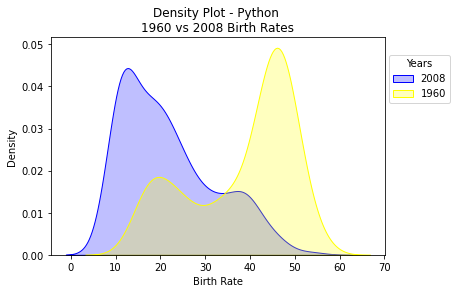

In [10]:
density = gaussian_kde(birth_2008['rate'])

fig, ax = plt.subplots()

sb.kdeplot(birth_2008['rate'] , bw_method = 0.3 , fill = True, color = 'blue', label = '2008')
sb.kdeplot(birth_1960['rate'] , bw_method = 0.3 , fill = True, color = 'yellow', label = '1960')

plt.title('Density Plot - Python \n1960 vs 2008 Birth Rates')
plt.xlabel('Birth Rate')

ax.legend(loc=(1.01, 0.7), ncol = 1, title = 'Years')

plt.show()

# Save figure
ax.get_figure().savefig('images/density-plot-python.png',
           bbox_inches = 'tight',
           transparent = True)